In [3]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import rasterio as rio
from rasterio.plot import show

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

import pandas as pd
import geopandas as gpd
import numpy as np

from rasterstats import zonal_stats
import pylandstats as pls      
from sklearn import metrics 

Module /Users/breyrobinson/miniconda3/envs/sds2023/lib/python3.9/site-packages/pylandstats/landscape.py has not been compiled for Transonic-Pythran


In [ ]:
#formatting and testing

In [5]:
lcm2015_england6_dr = rio.open("data/lcm2015_england6.tif")
lcm2015_england6= lcm2015_england6_dr.read(1)

In [6]:
lcm1990_england6_dr = rio.open("data/lcm1990_england6.tif")
lcm1990_england6= lcm1990_england6_dr.read(1)

In [7]:
legend_dict = {
    0: ['No Data', 'white'],
    1: ['Woodland', 'darkgreen'],
    2: ['Cropland', 'lightyellow'],
    3: ['Grassland', 'lightgreen'],
    4: ['Water', 'blue'],
    5: ['Built-up', 'black'],
    6: ['Other', 'grey'],
}

lccolors = [legend_dict[key][1] for key in sorted(legend_dict.keys())]
lcmap = ListedColormap(lccolors)

bounds = list(legend_dict.keys())
bounds.append(bounds[-1] + 1)

bnorm = BoundaryNorm(bounds, lcmap.N)
 
colourboxes = [plt.Rectangle(xy=(0, 0),width=1,height=1, 
                         facecolor=legend_dict[key][1],edgecolor='black') for key in sorted(legend_dict.keys())]

lclabels = [f"{legend_dict[key][0]}" for key in sorted(legend_dict.keys())]

idlabs = dict(zip(legend_dict.keys(), lclabels))

In [8]:
GB = gpd.read_file('data/CTYUA_(Dec_2019)_Ultra_Generalised_Clipped_Boundaries_in_the_UK.geojson').set_index('ctyua19nm')

In [9]:
GB  = GB.to_crs({'init': 'epsg:27700'}) 

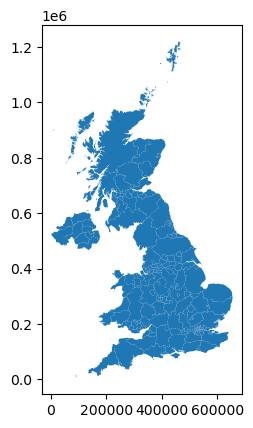

In [10]:
GB.plot()
plt.show()

In [11]:
england = GB[GB['ctyua19cd'].str.startswith("E")]
england

,OBJECTID,ctyua19cd,ctyua19nmw,bng_e,bng_n,long,lat,GlobalID,SHAPE_Length,SHAPE_Area,geometry
ctyua19nm,,,,,,,,,,,
Hartlepool,1,E06000001,,447160,531474,-1.27018,54.676140,{70A72826-C9A1-4826-9B47-CCEBF29EEF07},0.654035,0.013493,"MULTIPOLYGON (((448986.038 536729.679, 453194...."
Middlesbrough,2,E06000002,,451141,516887,-1.21099,54.544670,{77377060-55E8-41E2-8FA0-F0E450F22B5A},0.452613,0.007349,"MULTIPOLYGON (((451752.711 520561.904, 452424...."
Redcar and Cleveland,3,E06000003,,464361,519597,-1.00608,54.567520,{922557F5-4E33-4FC1-AFE6-98D2906DC9CE},1.118123,0.034547,"MULTIPOLYGON (((451965.649 521061.760, 454348...."
Stockton-on-Tees,4,E06000004,,444940,518183,-1.30664,54.556911,{148A3F71-5D57-455E-8851-05C075F8B306},1.064817,0.028787,"MULTIPOLYGON (((451965.649 521061.760, 451752...."
Darlington,5,E06000005,,428029,515648,-1.56835,54.535339,{87021DC3-C6DA-4CEC-BD9F-6EA5AC4FF744},1.129501,0.027620,"MULTIPOLYGON (((419709.312 515678.301, 419163...."
...,...,...,...,...,...,...,...,...,...,...,...
Suffolk,147,E10000029,,608219,266120,1.04919,52.253849,{5E2251C4-52F3-4331-BF2B-C20306000870},5.439734,0.503083,"MULTIPOLYGON (((651106.517 300527.108, 652813...."
Surrey,148,E10000030,,515966,153408,-0.33911,51.268028,{D92E6D64-E36B-4C42-910A-CDA164BDB50E},2.714848,0.214798,"MULTIPOLYGON (((507381.314 172142.008, 511946...."
Warwickshire,149,E10000031,,429584,253588,-1.56874,52.179771,{33E9A1A0-B340-4004-9D13-546C5CDBC820},3.963700,0.260323,"MULTIPOLYGON (((429849.410 299906.505, 432135...."


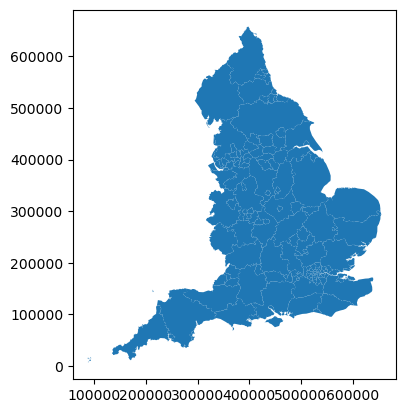

In [12]:
england.plot()
plt.show()

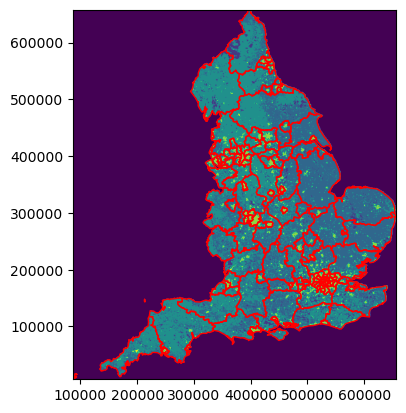

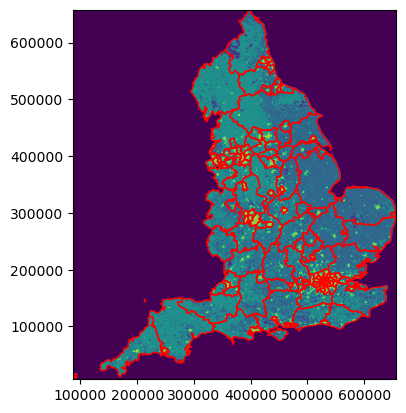

In [14]:
fig,ax=plt.subplots()
show((lcm2015_england6_dr,1), cmap='viridis',ax=ax)  
england.plot(ax=ax, facecolor='None', edgecolor='red', linewidth=1)

fig2,ax=plt.subplots()
show((lcm1990_england6_dr,1), cmap='viridis',ax=ax)  
england.plot(ax=ax, facecolor='None', edgecolor='red', linewidth=1)

plt.show()

In [15]:
zs_england15_6 = zonal_stats(england, lcm2015_england6,
                           affine=lcm2015_england6_dr.meta['transform'],
                           categorical=True)
zs_england15_6 

[{1: 1, 2: 46, 3: 14, 5: 32},
 {2: 6, 3: 8, 5: 38},
 {1: 17, 2: 82, 3: 92, 4: 1, 5: 58},
 {1: 2, 2: 109, 3: 30, 4: 1, 5: 66},
 {2: 134, 3: 39, 5: 25},
 {1: 3, 2: 22, 3: 9, 5: 46},
 {1: 4, 2: 92, 3: 15, 4: 1, 5: 65, 6: 1},
 {1: 9, 3: 95, 5: 36},
 {2: 2, 3: 1, 5: 30},
 {2: 8, 5: 65},
 {0: 1, 1: 7, 2: 2179, 3: 133, 4: 5, 5: 73, 6: 2},
 {1: 1, 2: 137, 3: 8, 5: 43},
 {0: 1, 1: 18, 2: 728, 3: 34, 4: 3, 5: 65, 6: 4},
 {1: 1, 2: 185, 3: 45, 5: 46},
 {1: 1, 2: 6, 3: 7, 5: 62},
 {2: 2, 3: 8, 5: 67},
 {1: 5, 2: 290, 3: 75, 4: 17, 5: 6, 6: 1},
 {2: 2, 3: 6, 5: 66},
 {1: 119, 2: 842, 3: 1196, 5: 24},
 {1: 18, 2: 180, 3: 39, 5: 58},
 {1: 1, 2: 1, 3: 24, 5: 67},
 {1: 3, 2: 62, 3: 246, 4: 5, 5: 37},
 {1: 4, 2: 1, 3: 7, 5: 97, 6: 1},
 {0: 1, 1: 24, 2: 12, 3: 287, 4: 1, 5: 46, 6: 1},
 {1: 8, 2: 93, 3: 330, 5: 70, 6: 2},
 {1: 3, 2: 1, 3: 11, 5: 64, 6: 2},
 {1: 1, 2: 10, 3: 10, 5: 43},
 {2: 104, 3: 75, 5: 51},
 {1: 5, 2: 260, 3: 18, 4: 1, 5: 58, 6: 1},
 {2: 4, 3: 2, 5: 40},
 {1: 1, 2: 4, 3: 6, 5: 32, 6: 3

In [16]:
zs_england90_6 = zonal_stats(england, lcm1990_england6,
                           affine=lcm1990_england6_dr.meta['transform'],
                           categorical=True)
zs_england90_6 

[{0: 2, 1: 1, 2: 52, 3: 11, 5: 27},
 {2: 7, 3: 8, 5: 37},
 {0: 1, 1: 15, 2: 80, 3: 105, 4: 1, 5: 47, 6: 1},
 {1: 4, 2: 122, 3: 27, 5: 55},
 {2: 151, 3: 25, 5: 22},
 {1: 1, 2: 27, 3: 15, 5: 36, 6: 1},
 {1: 2, 2: 100, 3: 26, 5: 50},
 {1: 11, 3: 106, 5: 23},
 {2: 5, 3: 4, 5: 24},
 {0: 1, 2: 8, 3: 2, 5: 62},
 {0: 7, 1: 6, 2: 2200, 3: 129, 4: 2, 5: 53, 6: 3},
 {2: 138, 3: 12, 5: 39},
 {0: 2, 1: 18, 2: 754, 3: 19, 4: 1, 5: 53, 6: 6},
 {2: 182, 3: 56, 5: 39},
 {2: 8, 3: 12, 5: 56},
 {2: 6, 3: 9, 5: 62},
 {1: 4, 2: 245, 3: 126, 4: 15, 5: 3, 6: 1},
 {2: 4, 3: 6, 5: 64},
 {1: 98, 2: 734, 3: 1327, 5: 22},
 {1: 11, 2: 196, 3: 50, 5: 38},
 {1: 1, 3: 32, 5: 60},
 {1: 2, 2: 39, 3: 280, 4: 5, 5: 27},
 {1: 2, 3: 14, 5: 93, 6: 1},
 {0: 3, 1: 30, 2: 10, 3: 292, 4: 1, 5: 35, 6: 1},
 {1: 5, 2: 68, 3: 379, 5: 47, 6: 4},
 {1: 2, 2: 8, 3: 8, 5: 61, 6: 2},
 {0: 5, 1: 1, 2: 3, 3: 16, 5: 39},
 {2: 81, 3: 107, 5: 42},
 {1: 3, 2: 272, 3: 21, 4: 2, 5: 45},
 {2: 6, 3: 4, 5: 36},
 {1: 1, 2: 6, 3: 7, 5: 30, 6: 2},
 {2

In [17]:
zs_england15_6_pd = pd.DataFrame(zs_england15_6)
zs_england15_6_pd.head()

,1,2,3,5,4,6,0
0,1.0,46.0,14.0,32,NaN,NaN,NaN
1,NaN,6.0,8.0,38,NaN,NaN,NaN
2,17.0,82.0,92.0,58,1.0,NaN,NaN
3,2.0,109.0,30.0,66,1.0,NaN,NaN
4,NaN,134.0,39.0,25,NaN,NaN,NaN


In [18]:
zs_england90_6_pd = pd.DataFrame(zs_england90_6)
zs_england90_6_pd.head()

,0,1,2,3,5,4,6
0,2.0,1.0,52.0,11.0,27.0,NaN,NaN
1,NaN,NaN,7.0,8.0,37.0,NaN,NaN
2,1.0,15.0,80.0,105.0,47.0,1.0,1.0
3,NaN,4.0,122.0,27.0,55.0,NaN,NaN
4,NaN,NaN,151.0,25.0,22.0,NaN,NaN


In [19]:
zs_england15_6_pd.set_index(england.index,inplace=True)

zs_england15_6_pd.rename(columns=idlabs,inplace=True) 

zs_england15_6_pd = zs_england15_6_pd.add_suffix('15')
 
england_gpd = pd.merge(england, zs_england15_6_pd, how='left', left_index=True, right_index=True)
england_gpd.head()

,OBJECTID,ctyua19cd,ctyua19nmw,bng_e,bng_n,long,lat,GlobalID,SHAPE_Length,SHAPE_Area,geometry,Woodland15,Cropland15,Grassland15,Built-up15,Water15,Other15,No Data15
ctyua19nm,,,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,,447160,531474,-1.27018,54.676140,{70A72826-C9A1-4826-9B47-CCEBF29EEF07},0.654035,0.013493,"MULTIPOLYGON (((448986.038 536729.679, 453194....",1.0,46.0,14.0,32,NaN,NaN,NaN
Middlesbrough,2,E06000002,,451141,516887,-1.21099,54.544670,{77377060-55E8-41E2-8FA0-F0E450F22B5A},0.452613,0.007349,"MULTIPOLYGON (((451752.711 520561.904, 452424....",NaN,6.0,8.0,38,NaN,NaN,NaN
Redcar and Cleveland,3,E06000003,,464361,519597,-1.00608,54.567520,{922557F5-4E33-4FC1-AFE6-98D2906DC9CE},1.118123,0.034547,"MULTIPOLYGON (((451965.649 521061.760, 454348....",17.0,82.0,92.0,58,1.0,NaN,NaN
Stockton-on-Tees,4,E06000004,,444940,518183,-1.30664,54.556911,{148A3F71-5D57-455E-8851-05C075F8B306},1.064817,0.028787,"MULTIPOLYGON (((451965.649 521061.760, 451752....",2.0,109.0,30.0,66,1.0,NaN,NaN
Darlington,5,E06000005,,428029,515648,-1.56835,54.535339,{87021DC3-C6DA-4CEC-BD9F-6EA5AC4FF744},1.129501,0.027620,"MULTIPOLYGON (((419709.312 515678.301, 419163....",NaN,134.0,39.0,25,NaN,NaN,NaN


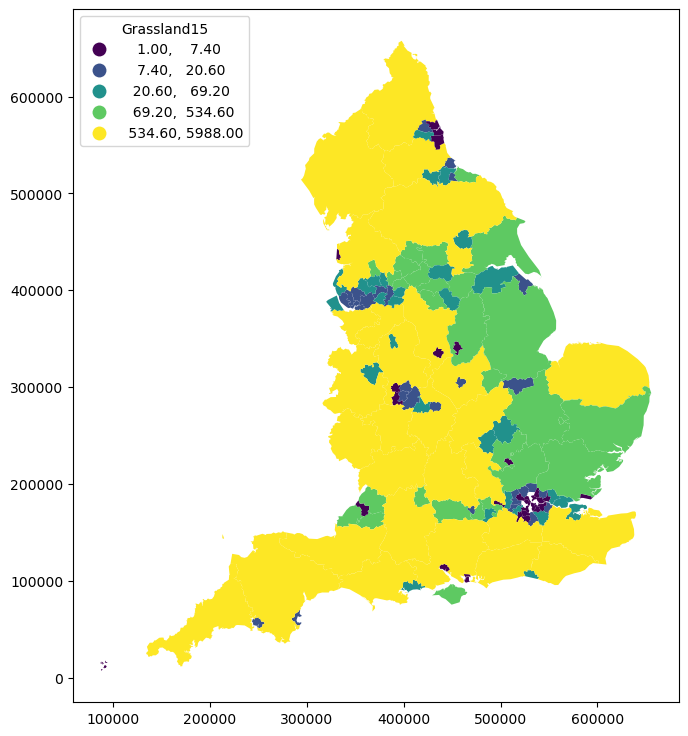

In [20]:
col = 'Grassland15'

fig, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column=col, cmap='viridis', 
        scheme='quantiles', k=5, 
        linewidth=0., 
        legend=True, legend_kwds={"title":col,"loc": 2},
        ax=ax
       )

plt.show()

In [22]:
zs_england90_6 = zonal_stats(england_gpd, lcm1990_england6,
                           affine=lcm1990_england6_dr.meta['transform'],
                           categorical=True)

zs_england90_6_pd = pd.DataFrame(zs_england90_6)

zs_england90_6_pd.set_index(england_gpd.index,inplace=True)

zs_england90_6_pd.rename(columns=idlabs,inplace=True)

zs_england90_6_pd = zs_england90_6_pd.add_suffix('90')
 
england_gpd = england_gpd.join(zs_england90_6_pd, how='left')

In [23]:
england_gpd.head()

,OBJECTID,ctyua19cd,ctyua19nmw,bng_e,bng_n,long,lat,GlobalID,SHAPE_Length,SHAPE_Area,...,Water15,Other15,No Data15,No Data90,Woodland90,Cropland90,Grassland90,Built-up90,Water90,Other90
ctyua19nm,,,,,,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,,447160,531474,-1.27018,54.676140,{70A72826-C9A1-4826-9B47-CCEBF29EEF07},0.654035,0.013493,...,NaN,NaN,NaN,2.0,1.0,52.0,11.0,27.0,NaN,NaN
Middlesbrough,2,E06000002,,451141,516887,-1.21099,54.544670,{77377060-55E8-41E2-8FA0-F0E450F22B5A},0.452613,0.007349,...,NaN,NaN,NaN,NaN,NaN,7.0,8.0,37.0,NaN,NaN
Redcar and Cleveland,3,E06000003,,464361,519597,-1.00608,54.567520,{922557F5-4E33-4FC1-AFE6-98D2906DC9CE},1.118123,0.034547,...,1.0,NaN,NaN,1.0,15.0,80.0,105.0,47.0,1.0,1.0
Stockton-on-Tees,4,E06000004,,444940,518183,-1.30664,54.556911,{148A3F71-5D57-455E-8851-05C075F8B306},1.064817,0.028787,...,1.0,NaN,NaN,NaN,4.0,122.0,27.0,55.0,NaN,NaN
Darlington,5,E06000005,,428029,515648,-1.56835,54.535339,{87021DC3-C6DA-4CEC-BD9F-6EA5AC4FF744},1.129501,0.027620,...,NaN,NaN,NaN,NaN,NaN,151.0,25.0,22.0,NaN,NaN


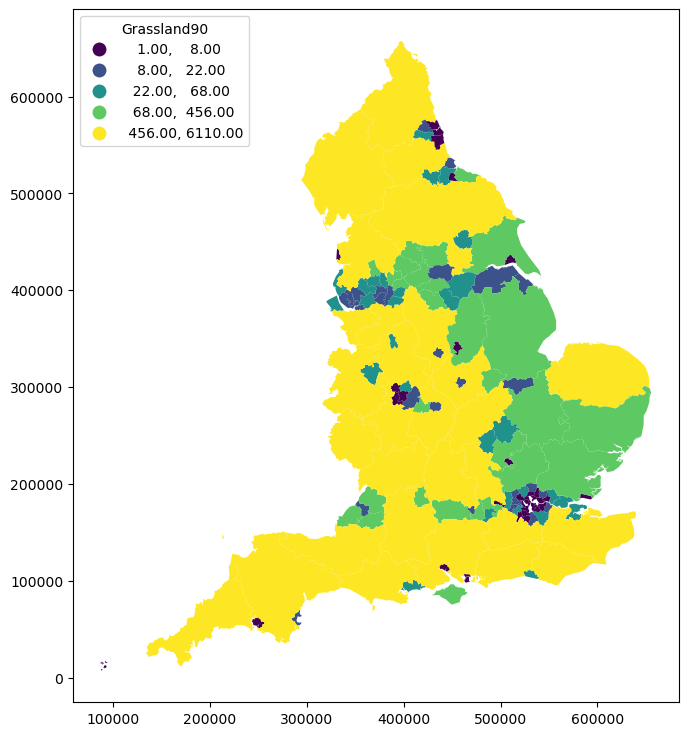

In [24]:
col = 'Grassland90'

fig, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column=col, cmap='viridis', 
        scheme='quantiles', k=5, 
        linewidth=0., 
        legend=True, legend_kwds={"title":col,"loc": 2},
        ax=ax
       )

plt.show()

In [25]:
england_gpd['Grassland_90-15'] = england_gpd['Grassland15'] - england_gpd['Grassland90']

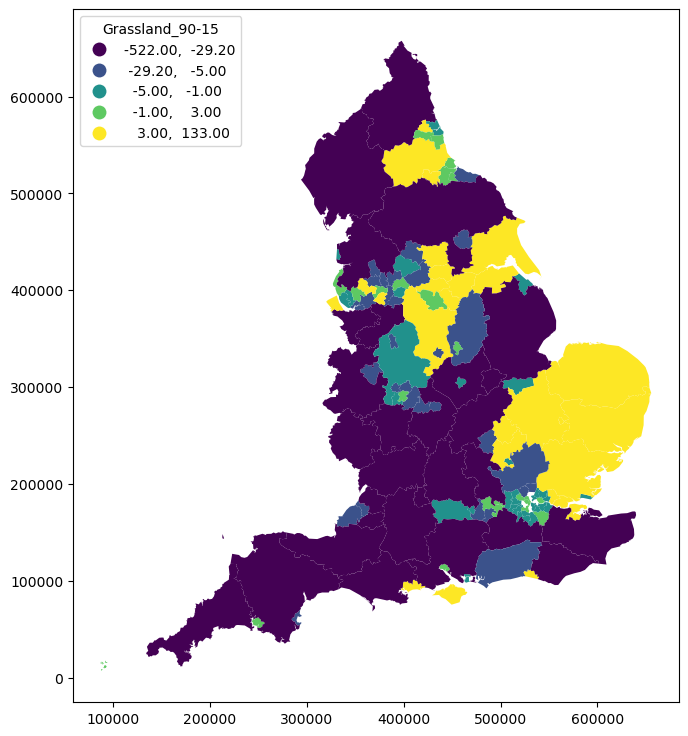

In [27]:
col='Grassland_90-15'

fig, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column=col, cmap='viridis', 
        scheme='quantiles', k=5, 
        linewidth=0., 
        legend=True, legend_kwds={"title":col,"loc": 2},
        ax=ax
       )

plt.show()

In [28]:
england_gpd['Built-Up_90-15'] = england_gpd['Built-up15'] - england_gpd['Built-up90']

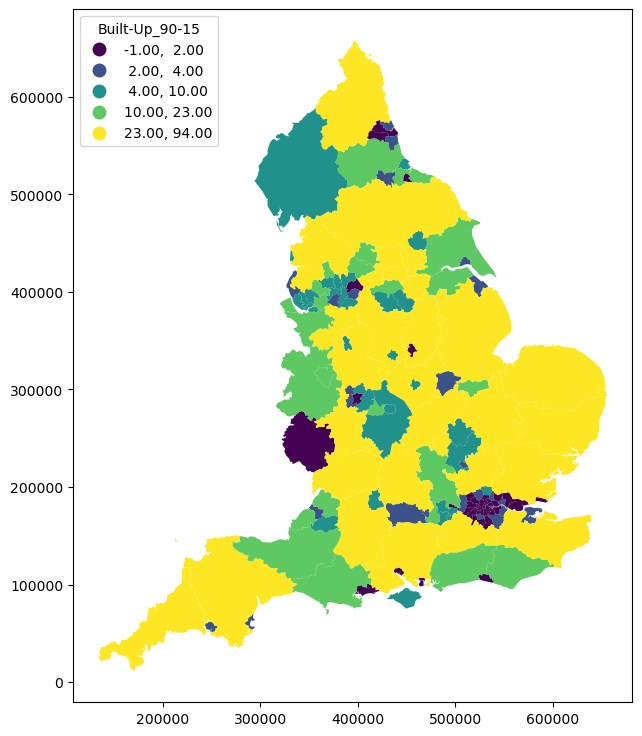

In [29]:
col='Built-Up_90-15'

fig, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column=col, cmap='viridis', 
        scheme='quantiles', k=5, 
        linewidth=0., 
        legend=True, legend_kwds={"title":col,"loc": 2},
        ax=ax
       )

plt.show()

In [ ]:
# percent change maps

In [31]:
england_gpd['Sum15'] = england_gpd.loc[:,'Woodland15':'Other15'].sum(axis=1)

england_gpd['Grassland_90-15Perc'] = 100* england_gpd['Grassland_90-15'] / england_gpd['Sum15']

In [32]:
grassbins = [-14,-10,-6, -2,0,2]

In [33]:
grasscmap = ListedColormap(["#d73027","#f46d43", "#fdae61", "#fee08b", "#d9ef8b", '#a6d96a'])

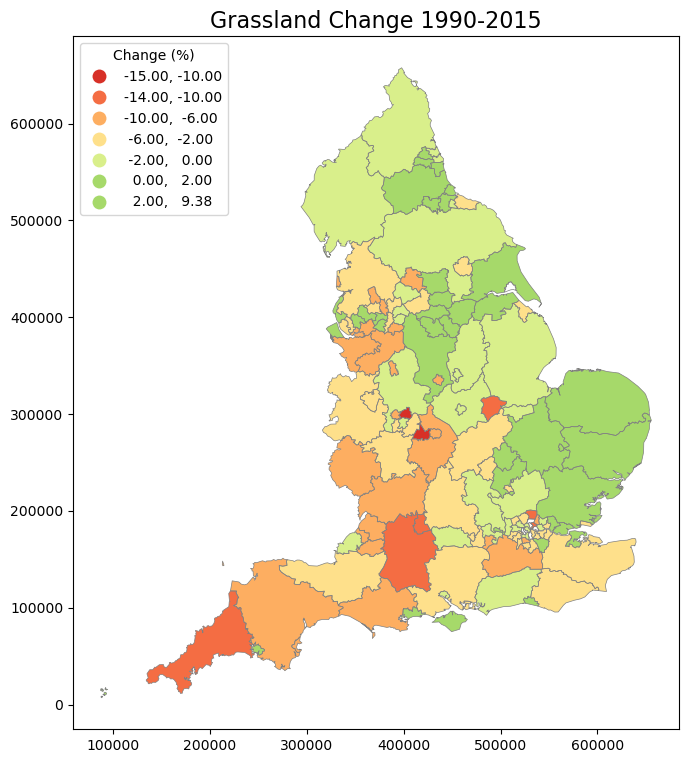

In [36]:
fig, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column='Grassland_90-15Perc', 
    cmap=grasscmap, 
    scheme='UserDefined', 
    classification_kwds={'bins': grassbins},  
    legend=True, legend_kwds={"title":"Change (%)","loc": 2}, ax=ax
)

england_gpd.plot(ax=ax, facecolor='None', edgecolor='grey', linewidth=0.5)

leg = ax.get_legend()
leg.get_texts()[0].set_text('-15.00, -10.00')

plt.title("Grassland Change 1990-2015", size=16)
plt.show()

<Axes: >

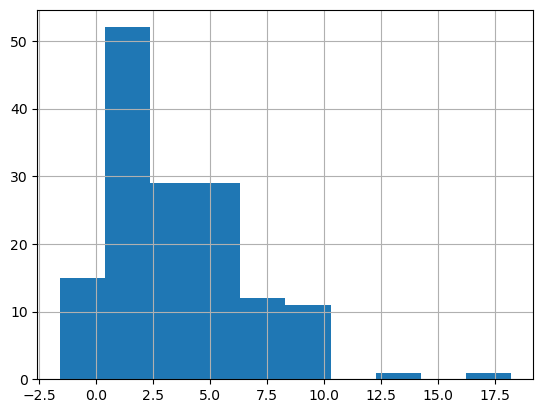

In [37]:
england_gpd['Built-Up_90-15Perc'] = 100* england_gpd['Built-Up_90-15'] / england_gpd['Sum15']

england_gpd['Built-Up_90-15Perc'].hist()

In [46]:
urbanbins = [0,2.5,5,10,20]  

urbancmap = ListedColormap(["#fee08b", "#d9ef8b", "#a6d96a", "#66bd63", "#1a9850", "#006837"])

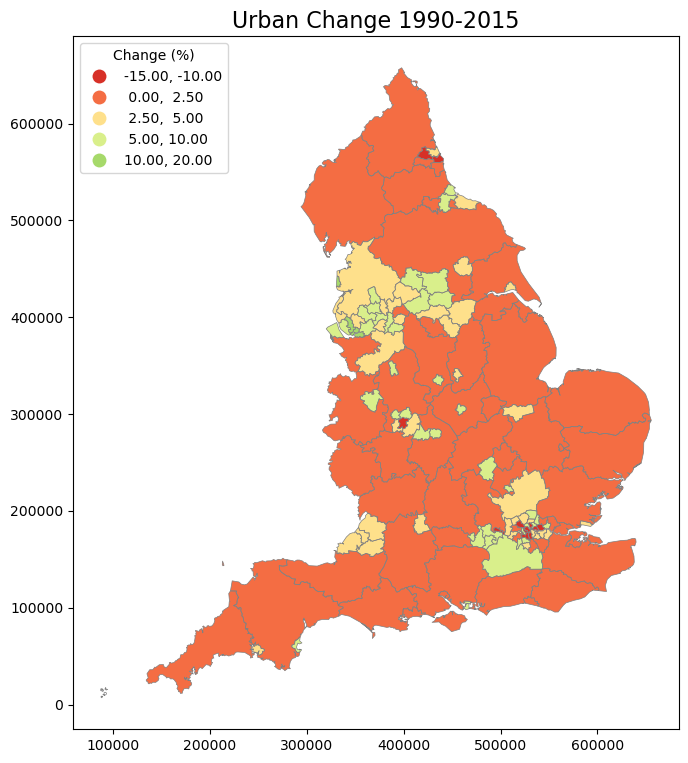

In [47]:
fig, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column='Built-Up_90-15Perc', 
    cmap=grasscmap, 
    scheme='UserDefined', 
    classification_kwds={'bins': urbanbins},  
    legend=True, legend_kwds={"title":"Change (%)","loc": 2}, ax=ax
)

england_gpd.plot(ax=ax, facecolor='None', edgecolor='grey', linewidth=0.5)

leg = ax.get_legend()
leg.get_texts()[0].set_text('-15.00, -10.00')

plt.title("Urban Change 1990-2015", size=16)
plt.show()

In [43]:
england_gpd['Woodland_90-15'] = england_gpd['Woodland15'] - england_gpd['Woodland90']
england_gpd['Cropland_90-15'] = england_gpd['Cropland15'] - england_gpd['Cropland90']

<Axes: >

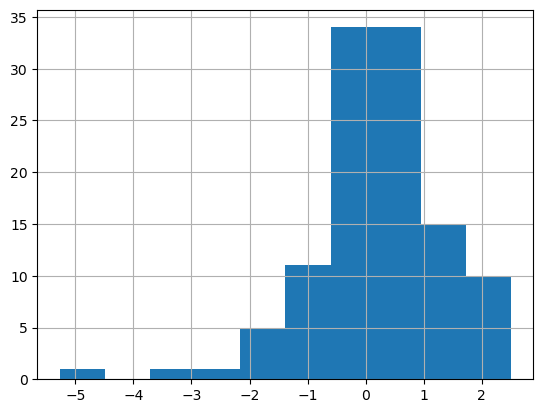

In [48]:
england_gpd['Woodland_90-15Perc'] = 100* england_gpd['Woodland_90-15'] / england_gpd['Sum15']

england_gpd['Woodland_90-15Perc'].hist()

In [53]:
woodbins = [-5,-2,0,1,3]  

woodcmap = ListedColormap(["#fee08b", "#d9ef8b", "#a6d96a", "#66bd63", "#1a9850", "#006837"])

<Axes: >

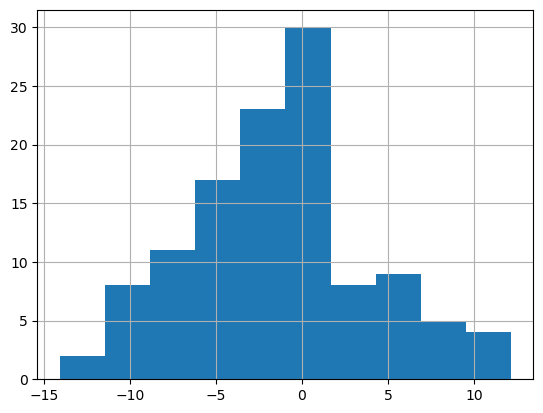

In [50]:
england_gpd['Cropland_90-15Perc'] = 100* england_gpd['Cropland_90-15'] / england_gpd['Sum15']

england_gpd['Cropland_90-15Perc'].hist()

In [52]:
cropbins = [-10,-5,0,5,10]  

cropcmap = ListedColormap(["#fee08b", "#d9ef8b", "#a6d96a", "#66bd63", "#1a9850", "#006837"])

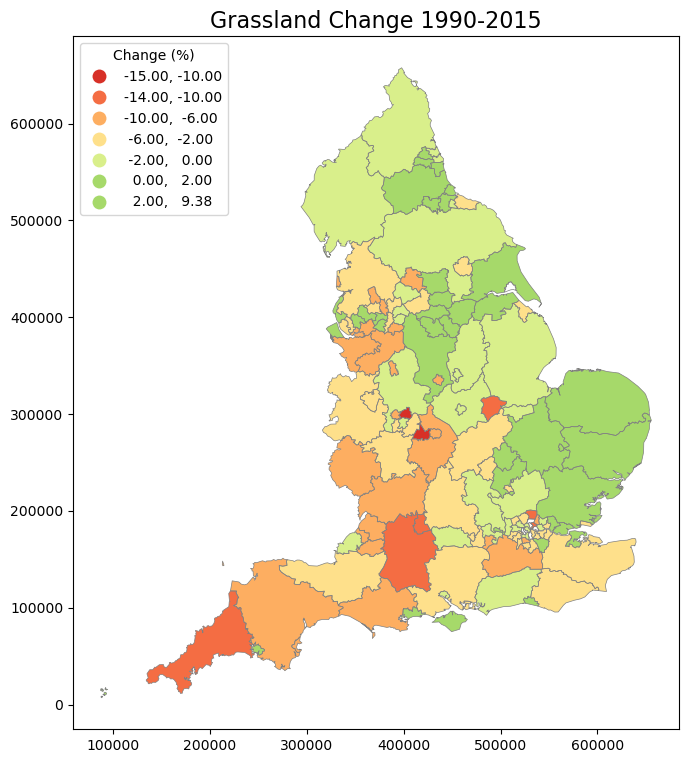

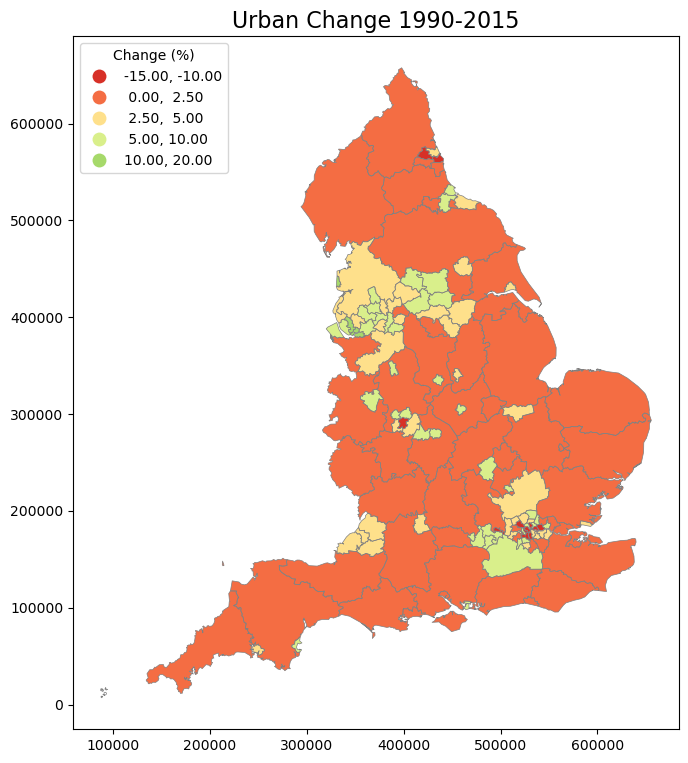

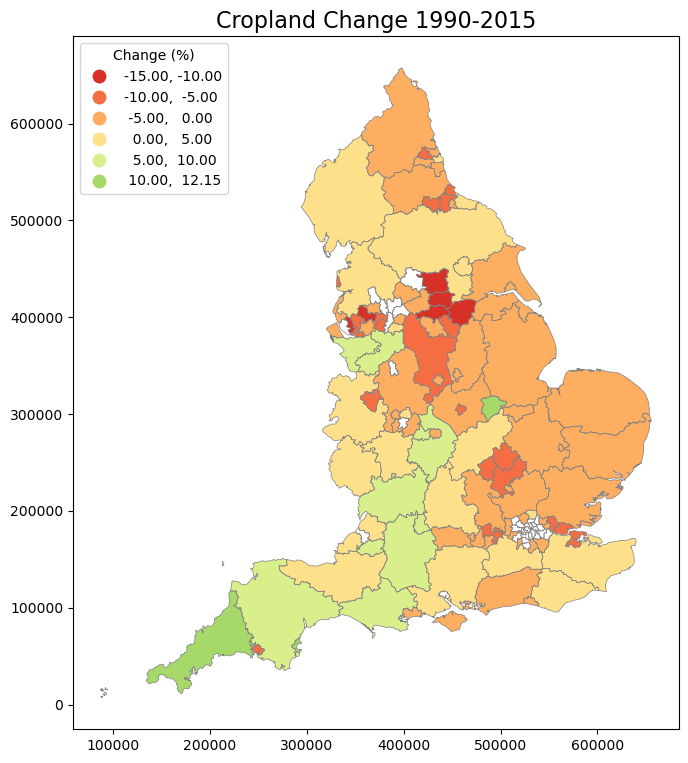

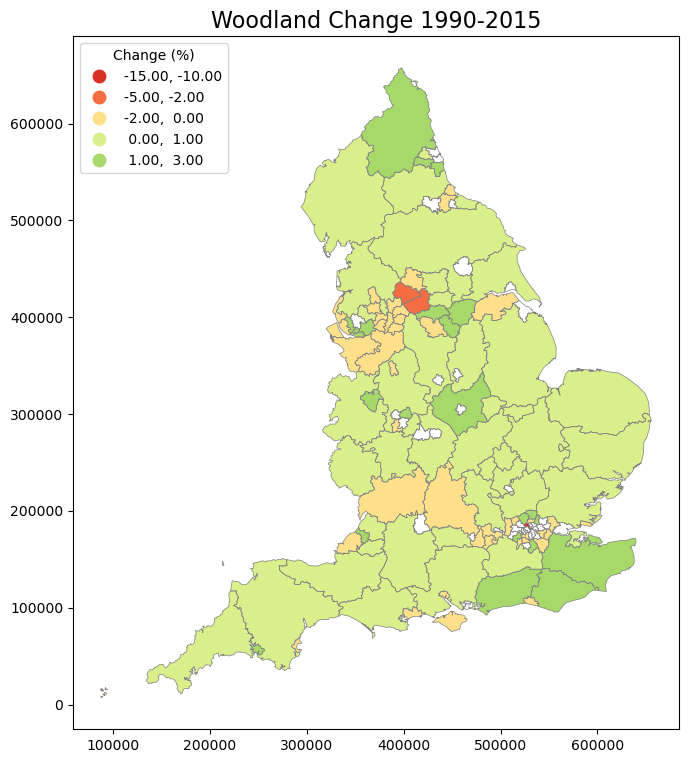

In [73]:
fig, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column='Grassland_90-15Perc', 
    cmap=grasscmap, 
    scheme='UserDefined', 
    classification_kwds={'bins': grassbins},  
    legend=True, legend_kwds={"title":"Change (%)","loc": 2}, ax=ax
)

england_gpd.plot(ax=ax, facecolor='None', edgecolor='grey', linewidth=0.5)

leg = ax.get_legend()
leg.get_texts()[0].set_text('-15.00, -10.00')

plt.title("Grassland Change 1990-2015", size=16)

fig2, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column='Built-Up_90-15Perc', 
    cmap=grasscmap, 
    scheme='UserDefined', 
    classification_kwds={'bins': urbanbins},  
    legend=True, legend_kwds={"title":"Change (%)","loc": 2}, ax=ax
)

england_gpd.plot(ax=ax, facecolor='None', edgecolor='grey', linewidth=0.5)

leg = ax.get_legend()
leg.get_texts()[0].set_text('-15.00, -10.00')

plt.title("Urban Change 1990-2015", size=16)

fig3, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column='Cropland_90-15Perc', 
    cmap=grasscmap, 
    scheme='UserDefined', 
    classification_kwds={'bins': cropbins},  
    legend=True, legend_kwds={"title":"Change (%)","loc": 2}, ax=ax
)

england_gpd.plot(ax=ax, facecolor='None', edgecolor='grey', linewidth=0.5)

leg = ax.get_legend()
leg.get_texts()[0].set_text('-15.00, -10.00')

plt.title("Cropland Change 1990-2015", size=16)

fig4, ax = plt.subplots(1, figsize=(9, 9))

england_gpd.plot(column='Woodland_90-15Perc', 
    cmap=grasscmap, 
    scheme='UserDefined', 
    classification_kwds={'bins': woodbins},  
    legend=True, legend_kwds={"title":"Change (%)","loc": 2}, ax=ax
)

england_gpd.plot(ax=ax, facecolor='None', edgecolor='grey', linewidth=0.5)

leg = ax.get_legend()
leg.get_texts()[0].set_text('-15.00, -10.00')

plt.title("Woodland Change 1990-2015", size=16)

fig.savefig('Landcover_perc_change', dpi=150, bbox_inches='tight', facecolor='White')

plt.show()

In [ ]:
#landscape metrics

<Axes: >

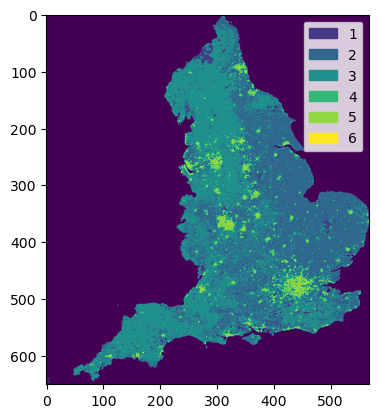

In [59]:
lsp1990 = pls.Landscape(lcm1990_england6, res=(1000,1000))
lsp1990.plot_landscape(legend=True)

In [61]:
lsp1990_lsp_df = lsp1990.compute_landscape_metrics_df(metrics=
                                 ["number_of_patches",
                                  "edge_density",
                                  "area_mn",
                                  "euclidean_nearest_neighbor_mn"]
                                )
lsp1990_lsp_df

,number_of_patches,edge_density,area_mn,euclidean_nearest_neighbor_mn
0,6749,4.839227,1931.693584,3521.063134


In [62]:
lsp2015 = pls.Landscape(lcm2015_england6, res=(1000,1000))
lsp2015_lsp_df = lsp2015.compute_landscape_metrics_df(metrics=
                                 ["number_of_patches",
                                  "edge_density",
                                  "area_mn",
                                  "euclidean_nearest_neighbor_mn"]
                                )
lsp2015_lsp_df

,number_of_patches,edge_density,area_mn,euclidean_nearest_neighbor_mn
0,7328,5.213049,1781.932314,3385.438724


In [63]:
st9015 = pls.SpatioTemporalAnalysis(landscapes=[lsp1990, lsp2015],
                                    dates=[1990,2015])

In [64]:
st9015_lsp_df = st9015.compute_landscape_metrics_df(metrics=
                                 ["number_of_patches",
                                  "edge_density",
                                  "area_mn",
                                  "euclidean_nearest_neighbor_mn"]
                                )
st9015_lsp_df

metric,number_of_patches,edge_density,area_mn,euclidean_nearest_neighbor_mn
dates,,,,
1990,6749.0,4.839227,1931.693584,3521.063134
2015,7328.0,5.213049,1781.932314,3385.438724


In [65]:
st9015_class_df = st9015.compute_class_metrics_df(
        metrics=["proportion_of_landscape", "number_of_patches", 
                 "edge_density",  "area_mn", "euclidean_nearest_neighbor_mn"]
                                )
st9015_class_df=st9015_class_df.rename(index=idlabs)
st9015_class_df

metric           proportion_of_landscape  number_of_patches  edge_density  \
class_val dates                                                             
Woodland  1990                  4.493365             1660.0      1.040730   
          2015                  4.972431             1838.0      1.148415   
Cropland  1990                 40.737133             1378.0      3.409757   
          2015                 41.621228             1422.0      3.660055   
Grassland 1990                 46.435530             2147.0      3.964102   
          2015                 43.574054             2305.0      4.169321   
Water     1990                  0.253126              145.0      0.074020   
          2015                  0.348445              203.0      0.100628   
Built-up  1990                  7.782465             1194.0      1.116284   
          2015                  9.278603             1405.0      1.296983   
Other     1990                  0.298382              225.0      0.073560   
          2015                  0.205238              155.0      0.050697   

metric               area_mn  euclidean_nearest_neighbor_mn  
class_val dates                                              
Woodland  1990    352.891566                    3536.918369  
          2015    353.264418                    3534.073754  
Cropland  1990   3854.063861                    2598.430500  
          2015   3822.011252                    2516.827941  
Grassland 1990   2819.655333                    2531.581749  
          2015   2468.503254                    2445.062741  
Water     1990    227.586207                   11946.918264  
          2015    224.137931                   10196.900512  
Built-up  1990    849.748744                    4322.438347  
          2015    862.348754                    3941.807308  
Other     1990    172.888889                    8813.923634  
          2015    172.903226                    9611.989580

<Axes: xlabel='class_val', ylabel='Number of Patches'>

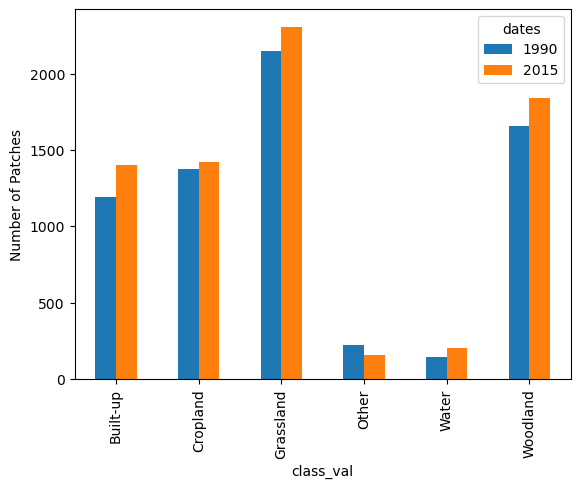

In [66]:
st9015_class_df["number_of_patches"].unstack().plot.bar(ylabel="Number of Patches")

<Axes: xlabel='class_val', ylabel='Edge Density'>

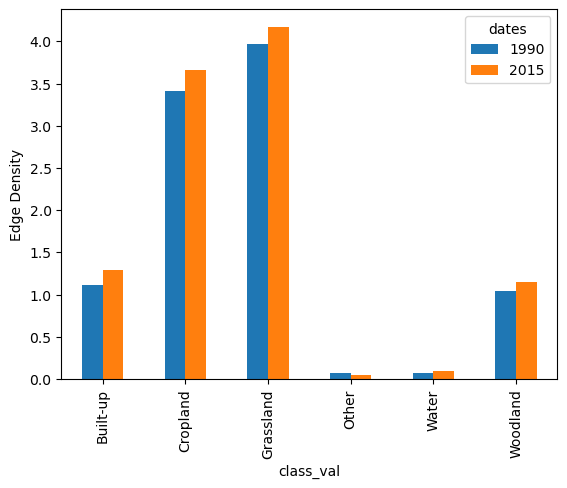

In [67]:
st9015_class_df["edge_density"].unstack().plot.bar(ylabel="Edge Density")

In [ ]:
#pixel by pixel change

In [68]:
lcm1990_england6_f = lcm1990_england6.flatten()  
lcm2015_england6_f = lcm2015_england6.flatten()  

print(lcm1990_england6_f.shape)

(370419,)


In [69]:
confND = metrics.confusion_matrix(lcm1990_england6_f, lcm2015_england6_f)
print(confND.shape)
print('\n')
print(confND)

(7, 7)


[[239839     12     48     75      2     57     16]
 [     0   5061    162    487      6    141      1]
 [     0    387  46520   5380     73    733     16]
 [     0    983   7492  50648     56   1305     54]
 [     0      2      4     16    306      2      0]
 [     0     34     77    168      4   9860      3]
 [     0     14     46    125      8     18    178]]


In [70]:
def stripFirstRows(mydat):
    
    stripped = np.delete(arr=mydat, obj=0, axis=0)     
    stripped = np.delete(arr=stripped, obj=0, axis=1)  
    
    return stripped

In [71]:
conf = stripFirstRows(confND)

print(conf.shape)
print('\n')
print(conf)

(6, 6)


[[ 5061   162   487     6   141     1]
 [  387 46520  5380    73   733    16]
 [  983  7492 50648    56  1305    54]
 [    2     4    16   306     2     0]
 [   34    77   168     4  9860     3]
 [   14    46   125     8    18   178]]


In [72]:
conf_pd = pd.DataFrame(conf,index=lclabels[1:],columns=lclabels[1:])
conf_pd

,Woodland,Cropland,Grassland,Water,Built-up,Other
Woodland,5061,162,487,6,141,1
Cropland,387,46520,5380,73,733,16
Grassland,983,7492,50648,56,1305,54
Water,2,4,16,306,2,0
Built-up,34,77,168,4,9860,3
Other,14,46,125,8,18,178
